# SOE COMPARISONS
### History: <br>
> * *12/25: notebook initialized by HS*

### Prerequisites: 
* Have access to EDAB network drive and EPU_NOESTUARIES shapefile 

### Objectives: 
* Check for differences between processed historical data between years to ensure no bugs/errors
* Basic comparisons between current year (for SOE) and previous years data 



In [81]:
import os 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import geopandas as gpd
import numpy as np
import pandas as pd
import cmocean as cm

def get_dirs(years):
    """
    PURPOSE: 
        Get directories for the SOE Phytoplankton specific purposes!
    REQUIRED INPUT: 
        years (list): years of data to get directories for 
    OPTIONAL INPUT: 
        NA
    HISTORY:
        12/12/25: Function initialized by HS 
    """
    basedir=os.path.abspath(os.path.join('W:','nadata','PROJECTS','SOE_PHYTOPLANKTON'))
    dir1 = os.path.join(basedir,'V'+years[0],'DATA_EXTRACTS','SOE_FORMAT')
    dir2 = os.path.join(basedir,'V'+years[1],'DATA_EXTRACTS','SOE_FORMAT')
    return dir1, dir2

def get_uniqueid(df,printvals=True):
    """
    PURPOSE: 
        Find the number of unique values in each columns of dataframe. This is used in conjunction with compare_historical function to merge dataframe 
        columns with unique identifiers.
    REQUIRED INPUT: 
        df (pandas dataframe): input dataframe 
    OPTIONAL INPUT: 
        printvals (boolean): True prints how many unique values are in each column in the dataframe. False will not print any of the values. 
    HISTORY:
        12/12/25: Function initialized by HS 
    """
    ls = []
    for var in df.columns:
        if printvals==True: 
            print(f'{var} has {len(df[var].unique())} values')
        if len(df[var].unique())==len(df):
            ls.append(var)
    if len(ls)==0:
        #print('No unique identifiers found') 
        pass
    return ls

def compare_historical(df1,df2,var_name,df_id):
    """
    PURPOSE: 
        Compare historical values from SOE phytoplankton data to ensure that no erros have occurred in calculations in a new year. 
    REQUIRED INPUT: 
        df1 (pandas dataframe): first year input dataframe
        df2 (pandas dataframe): second year input dataframe
        var_name (string): column name of values to compare. Must be consistent between both dataframes
        df_id (string): product name of comparison (ie chl, fpico, etc). Used when printing results.
    OPTIONAL INPUT: 
        NA
    HISTORY:
        12/12/25: Function initialized by HS 
    """
    #look for unique values to join datasets to compare 
    uniq1 = get_uniqueid(df1,printvals=False)
    uniq2 = get_uniqueid(df2,printvals=False)
    
    if len(uniq1) > 0: 
        merged = pd.merge(df1,df2, on =uniq1, how='inner',suffixes=('_df1','_df2'))
        dif = merged[f'{var_name}_df1'].values - merged[f'{var_name}_df2'].values
    else: 
        #print('Since there are no ways to uniquely ID each row, we cannot directly merge that dataframes. Instead we will look values from each dataframe separately, as the indices should be the same')
        dif = df1[var_name].values-df1[:len(df2)][var_name].values
        if any(x > 0 for x in list(dif)) == False:
            print(f'{df_id.split('-')[0]}: There are no differences between the two dataset values! No changes in the historical data.')
        else: 
            print(f'{df_id.split('-')[0]}: Differences have been detected. Further analysis is needed') 
    return dif 

def realign_phyto_SOE(df, csv_name=None):
    #NEEDS TO HAVE RESET_INDEX
    if isinstance(df.VALUE.iloc[0], str)==True:
        cols = df.columns
        v1 = df.columns[np.where((df.iloc[0]=='Blended OCI')==True)][0]
        v2 = df.columns[np.where((df.iloc[0]==' OC3/4 and OC5 Algorithm')==True)][0]
        df[v1] = df[v1].astype(str) + df[v2].astype(str)
        df = df.drop(v2,axis=1)
        df = df.drop(list(df.columns[np.where(df.iloc[0].isna()==True)]),axis=1)
        df.columns = cols.drop(['level_0','level_1'])
        if csv_name!=None: 
            df.to_csv(csv_name)
    return df

## Compare historical data

In [2]:
dir1, dir2= get_dirs(['2025','2026']) #get directories for each year 
df_ids = ['CHLOR_A-STATS','PPD-STATS','FMICRO-STATS','FNANO-STATS','FPICO-STATS','MICRO-STATS','NANO-STATS','PICO-STATS'] #unique id from dataframe csv to check 
for df_id in df_ids:
    #open data 
    df1 = pd.read_csv(os.path.join(dir1,[s for s in os.listdir(dir1) if df_id in s][0]))
    df2 = pd.read_csv(os.path.join(dir2,[s for s in os.listdir(dir2) if df_id in s][0]))
    #compare historical data to make sure there weren't any changes/errors when re-calculating the data 
    if isinstance(df1.VALUE.iloc[0], str):
        var_name='PROD'
    else: 
        var_name='VALUE'
    dif = compare_historical(df1,df2,var_name,df_id)

#TO DO: RAISE ERROR IF THERE ARE DIFFERENCES
#SOME OF THE CSVS READ IN WEIRD AND SWITCH THE COLUMN NAMES --> FIGURE OUT WHY 

CHLOR_A: There are no differences between the two dataset values! No changes in the historical data.
PPD: There are no differences between the two dataset values! No changes in the historical data.
FMICRO: There are no differences between the two dataset values! No changes in the historical data.
FNANO: There are no differences between the two dataset values! No changes in the historical data.
FPICO: There are no differences between the two dataset values! No changes in the historical data.
MICRO: There are no differences between the two dataset values! No changes in the historical data.
NANO: There are no differences between the two dataset values! No changes in the historical data.


C:\Users\haley.synan\AppData\Local\Temp\ipykernel_3748\1149359391.py:5: DtypeWarning: Columns (19,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(os.path.join(dir1,[s for s in os.listdir(dir1) if df_id in s][0]))
C:\Users\haley.synan\AppData\Local\Temp\ipykernel_3748\1149359391.py:6: DtypeWarning: Columns (19,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(os.path.join(dir2,[s for s in os.listdir(dir2) if df_id in s][0]))


PICO: There are no differences between the two dataset values! No changes in the historical data.


In [3]:
dir1, dir2= get_dirs(['2025','2026']) #get directories for each year 
df_ids = ['CHLOR_A-STATS','PPD-STATS','FMICRO-STATS','FNANO-STATS','FPICO-STATS','MICRO-STATS','NANO-STATS','PICO-STATS'] #unique id from dataframe csv to check 
for df_id in df_ids:
    df1 = pd.read_csv(os.path.join(dir1,[s for s in os.listdir(dir1) if df_id in s][0])).reset_index()
    df2 = pd.read_csv(os.path.join(dir2,[s for s in os.listdir(dir2) if df_id in s][0])).reset_index()
    df1 = realign_phyto_SOE(df1)#,csv_name=os.path.join(dir1,[s for s in os.listdir(dir1) if df_id in s][0]).split('.')[0]+'_V1.csv')
    df2 = realign_phyto_SOE(df2)#,csv_name=os.path.join(dir1,[s for s in os.listdir(dir1) if df_id in s][0]).split('.')[0]+'_V1.csv')
    variables=df2.VARIABLE.unique()
    for variable in variables:
        sub1 = df1[df1.VARIABLE==variable]
        sub2 = df2[df2.VARIABLE==variable]
        sub2=sub2[sub2['PERIOD'].str.contains('2025', case=False, na=False)==False].drop_duplicates() #get rid of 2025 data for this purpose
        if len(sub1)!=len(sub2):
            if len(sub2)>len(sub1):
                print(f'{df_id},{variable}: LENGTH MISMATCH ISSUE. The new data from 2025 is missing: {[item for item in sub1.PERIOD.unique() if item not in set(sub2.PERIOD.unique())]}')
            elif len(sub1)>len(sub2):
                print(f'{df_id},{variable}: LENGTH MISMATCH ISSUE. The data from 2024 is missing: {[item for item in sub1.PERIOD.unique() if item not in set(sub2.PERIOD.unique())]}')
        else: 
            if any(sub1[var_name].values==sub2[var_name].values) == False: 
                print(f'{df_id},{variable}: ALIGNMENT MISMATCH ISSUE. columns with differences: {list(sub1.columns[np.where((sub1.reset_index(drop=True)==sub2.reset_index(drop=True)).any()==False)])}')
            else:
                print(f'{df_id},{variable}: Data matches!')

CHLOR_A-STATS,ANNUAL_CHLOR_A_RATIO_ANOMALY: Data matches!
CHLOR_A-STATS,WEEKLY_CHLOR_A_RATIO_ANOMALY: LENGTH MISMATCH ISSUE. The data from 2024 is missing: ['W_202025']
CHLOR_A-STATS,MONTHLY_CHLOR_A_RATIO_ANOMALY: Data matches!
CHLOR_A-STATS,ANNUAL_CHLOR_A_MEDIAN: Data matches!
CHLOR_A-STATS,WEEKLY_CHLOR_A_MEDIAN: LENGTH MISMATCH ISSUE. The data from 2024 is missing: ['W_202025']
CHLOR_A-STATS,MONTHLY_CHLOR_A_MEDIAN: Data matches!
CHLOR_A-STATS,LONGTERM_ANNUAL_CHLOR_A_MEDIAN: Data matches!
CHLOR_A-STATS,CLIMATOLOGICAL_WEEK_CHLOR_A_MEDIAN: Data matches!
CHLOR_A-STATS,CLIMATOLOGICAL_MONTH_CHLOR_A_MEDIAN: Data matches!
PPD-STATS,ANNUAL_PPD_RATIO_ANOMALY: Data matches!
PPD-STATS,WEEKLY_PPD_RATIO_ANOMALY: LENGTH MISMATCH ISSUE. The data from 2024 is missing: ['W_202025']
PPD-STATS,MONTHLY_PPD_RATIO_ANOMALY: Data matches!
PPD-STATS,ANNUAL_PPD_MEDIAN: Data matches!
PPD-STATS,WEEKLY_PPD_MEDIAN: LENGTH MISMATCH ISSUE. The data from 2024 is missing: ['W_202025']
PPD-STATS,MONTHLY_PPD_MEDIAN: Dat

C:\Users\haley.synan\AppData\Local\Temp\ipykernel_3748\2019931655.py:4: DtypeWarning: Columns (19,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(os.path.join(dir1,[s for s in os.listdir(dir1) if df_id in s][0])).reset_index()
C:\Users\haley.synan\AppData\Local\Temp\ipykernel_3748\2019931655.py:5: DtypeWarning: Columns (19,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(os.path.join(dir2,[s for s in os.listdir(dir2) if df_id in s][0])).reset_index()


PICO-STATS,ANNUAL_CHLOR_A_RATIO_ANOMALY: Data matches!
PICO-STATS,WEEKLY_CHLOR_A_RATIO_ANOMALY: LENGTH MISMATCH ISSUE. The data from 2024 is missing: ['W_202025']
PICO-STATS,MONTHLY_CHLOR_A_RATIO_ANOMALY: Data matches!
PICO-STATS,ANNUAL_CHLOR_A_MEDIAN: Data matches!
PICO-STATS,WEEKLY_CHLOR_A_MEDIAN: LENGTH MISMATCH ISSUE. The data from 2024 is missing: ['W_202025']
PICO-STATS,MONTHLY_CHLOR_A_MEDIAN: Data matches!
PICO-STATS,LONGTERM_ANNUAL_CHLOR_A_MEDIAN: Data matches!
PICO-STATS,CLIMATOLOGICAL_WEEK_CHLOR_A_MEDIAN: Data matches!
PICO-STATS,CLIMATOLOGICAL_MONTH_CHLOR_A_MEDIAN: Data matches!
PICO-STATS,ANNUAL_PPD_RATIO_ANOMALY: Data matches!
PICO-STATS,WEEKLY_PPD_RATIO_ANOMALY: LENGTH MISMATCH ISSUE. The data from 2024 is missing: ['W_202025']
PICO-STATS,MONTHLY_PPD_RATIO_ANOMALY: Data matches!
PICO-STATS,ANNUAL_PPD_MEDIAN: Data matches!
PICO-STATS,WEEKLY_PPD_MEDIAN: LENGTH MISMATCH ISSUE. The data from 2024 is missing: ['W_202025']
PICO-STATS,MONTHLY_PPD_MEDIAN: Data matches!
PICO-STATS

## Compare two years of data 

### Create weekly plots 


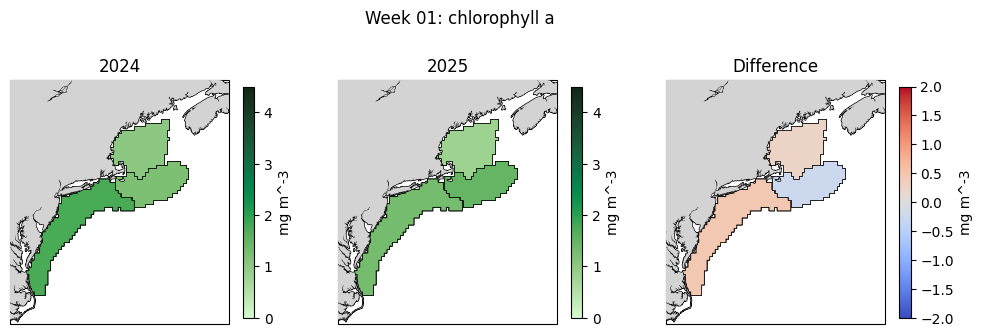

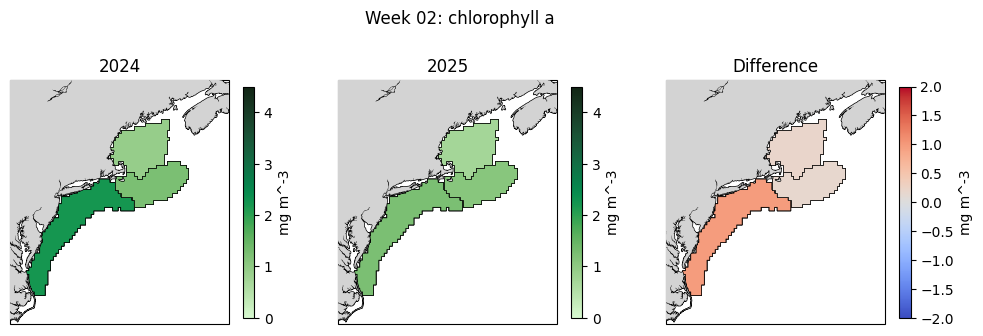

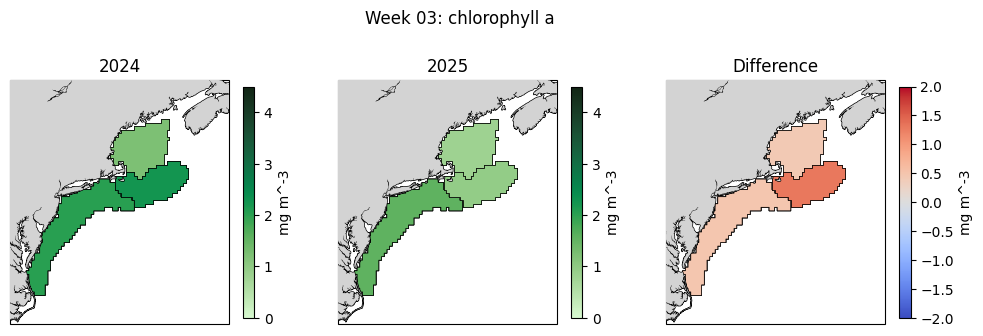

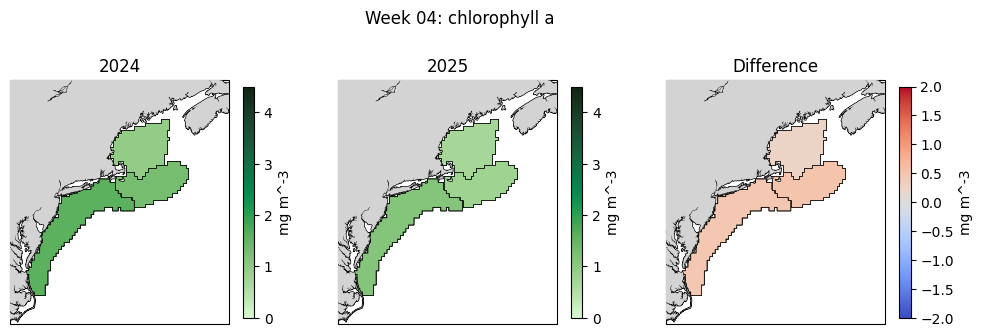

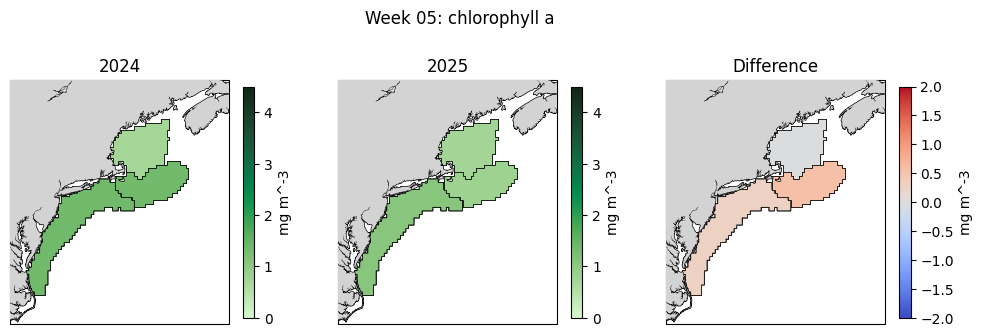

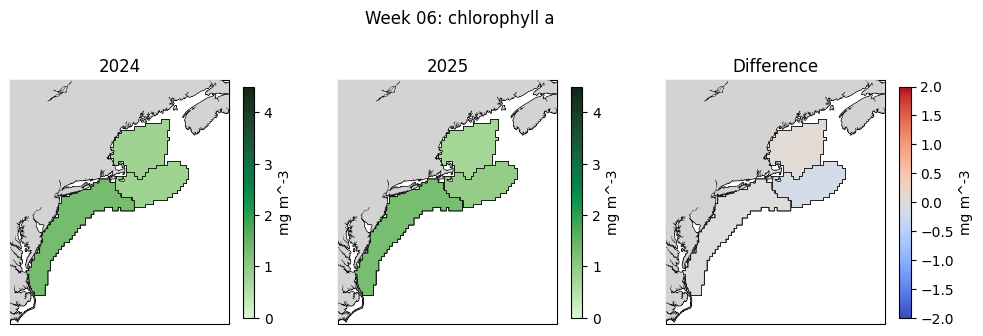

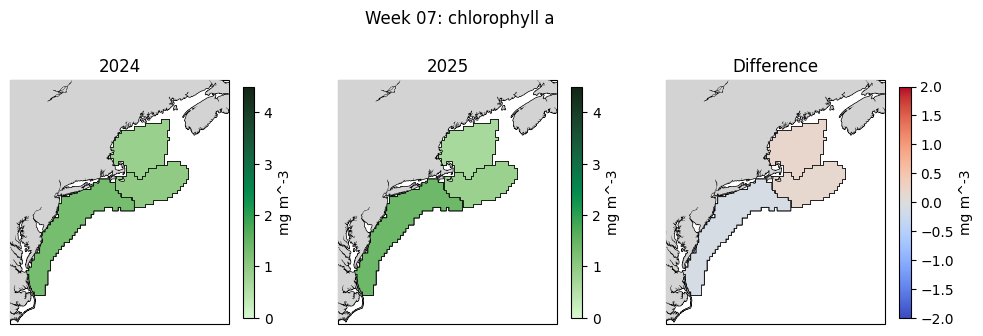

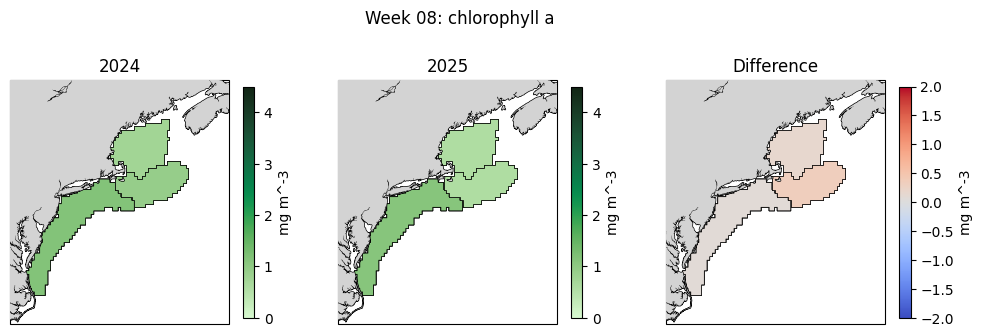

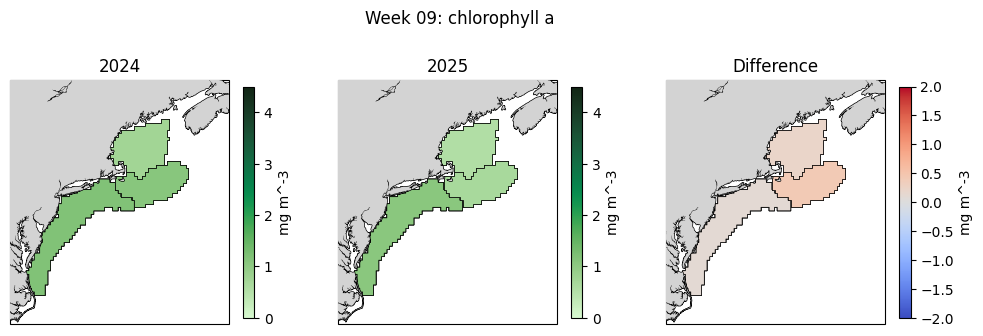

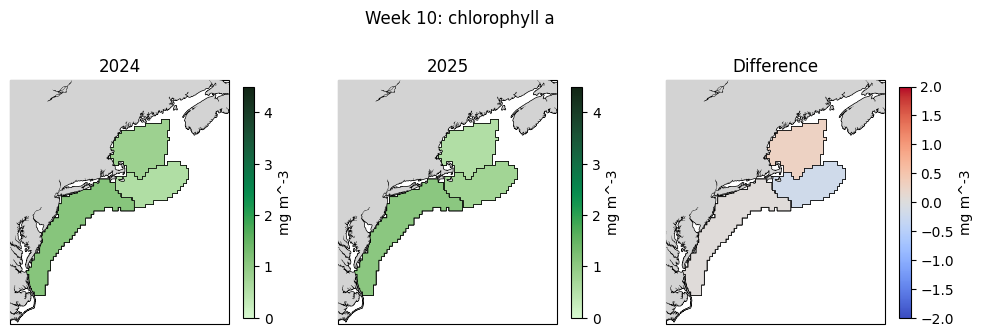

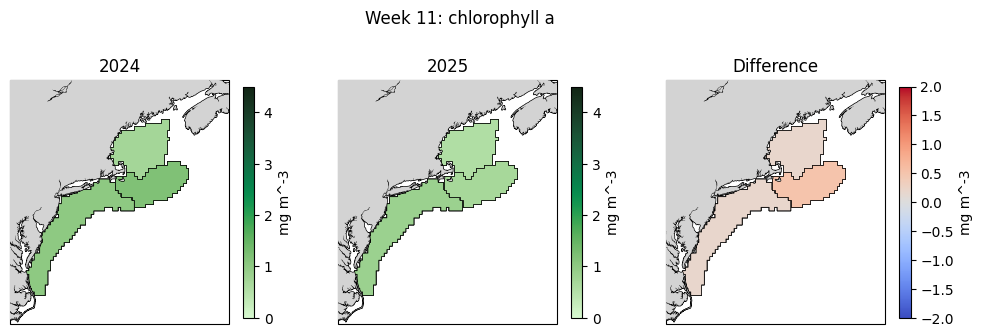

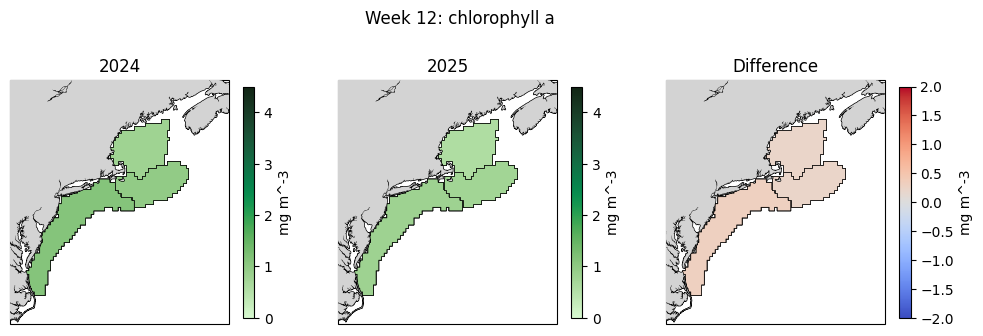

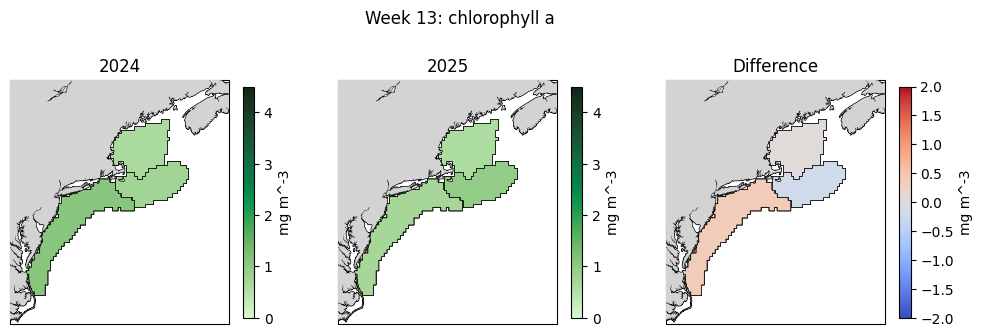

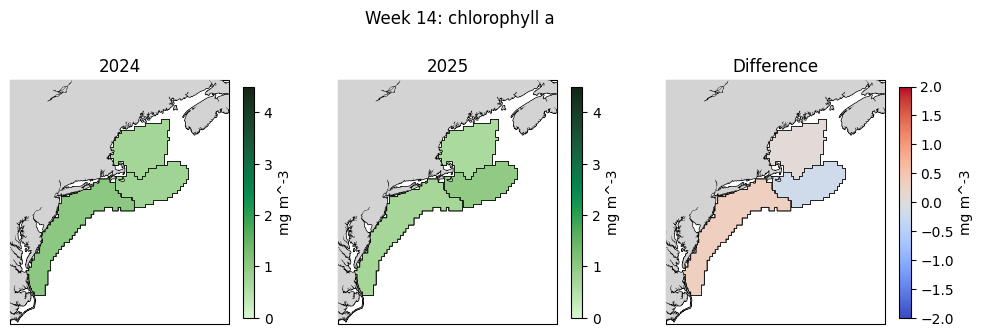

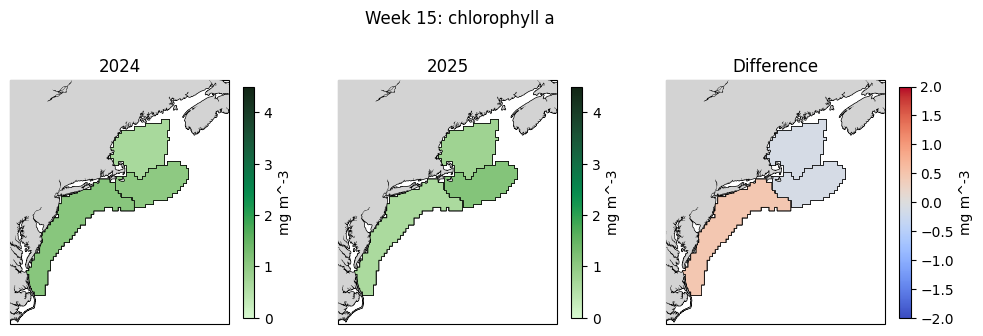

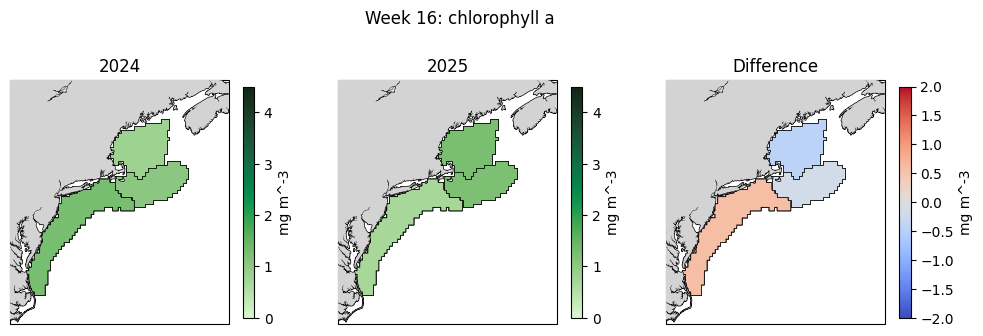

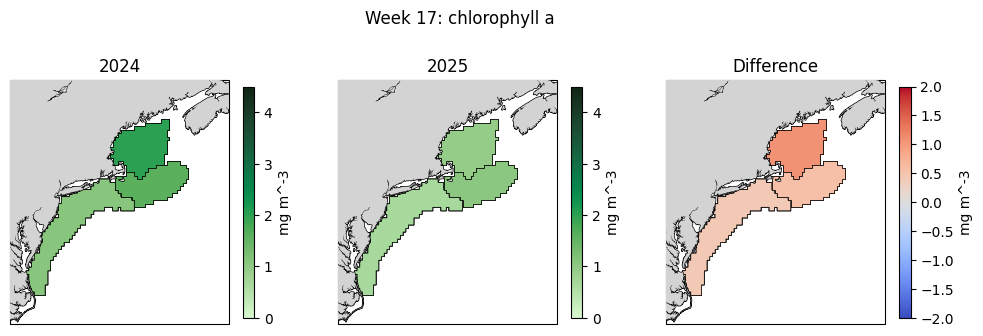

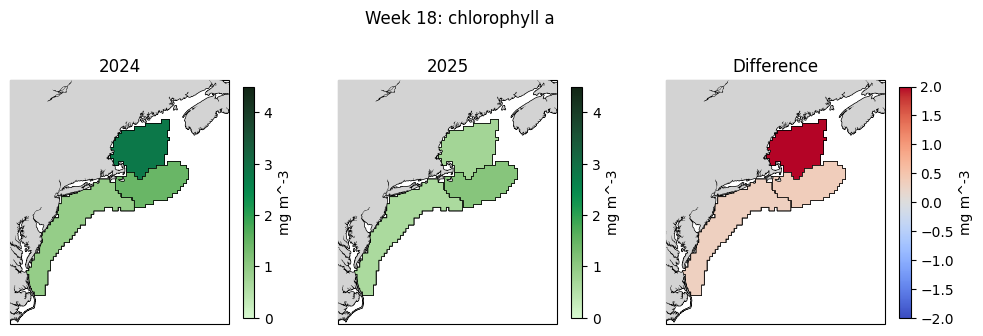

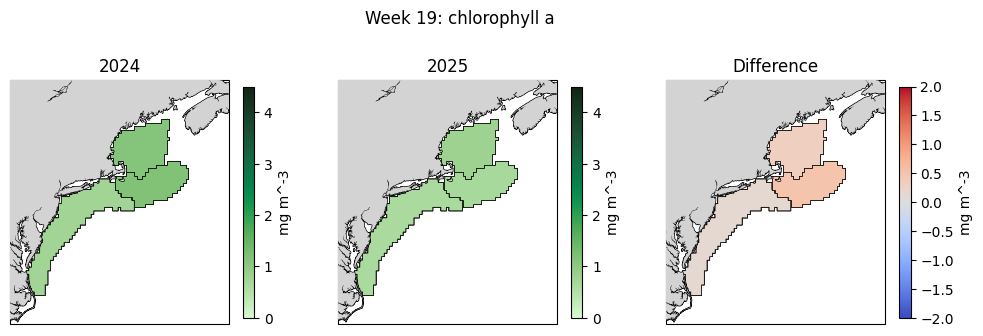

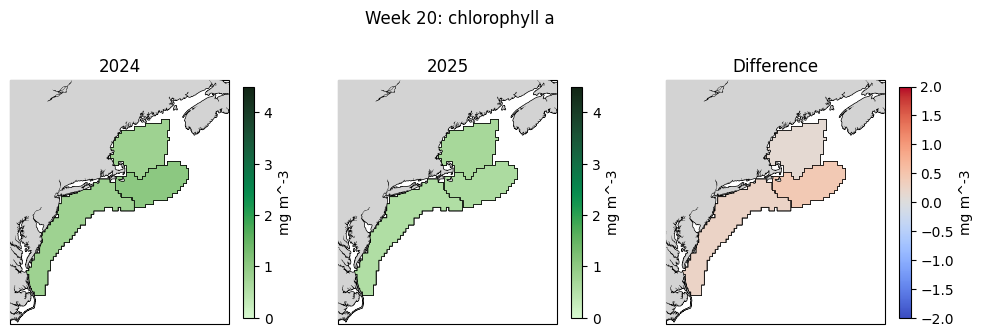

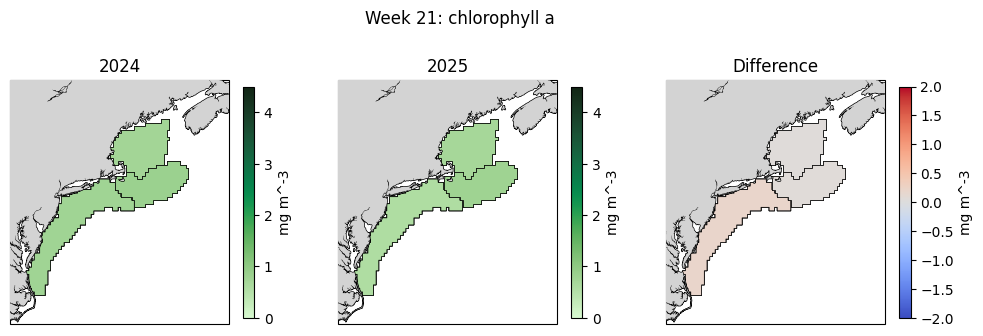

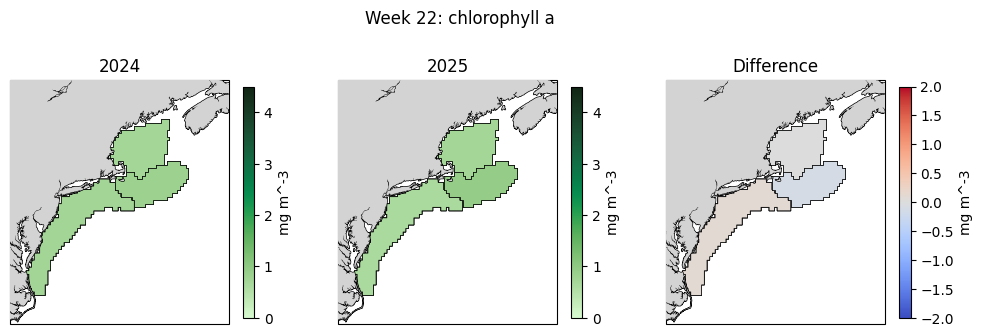

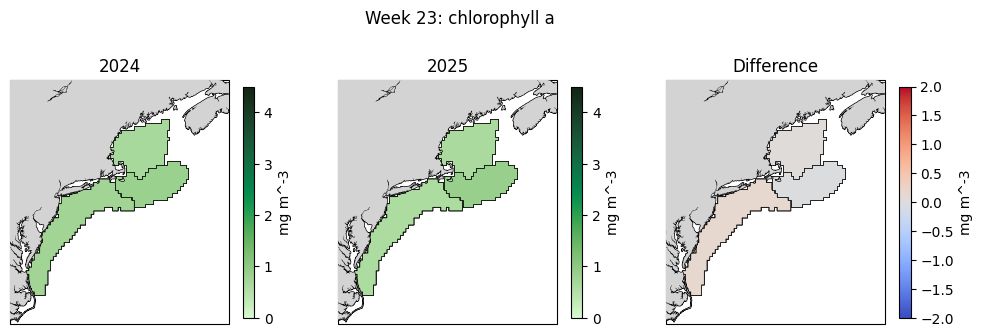

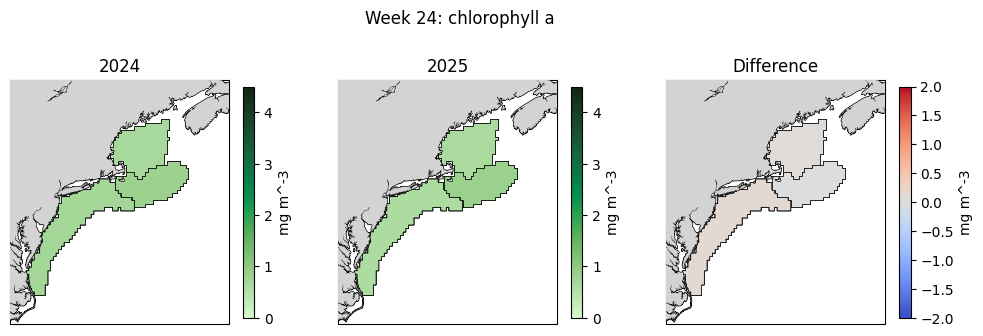

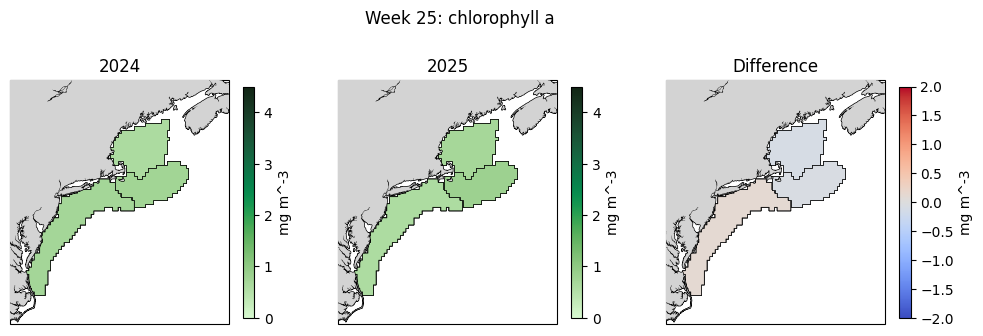

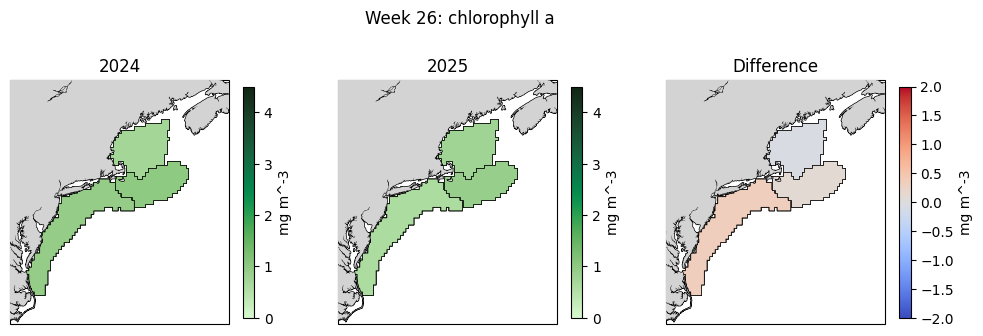

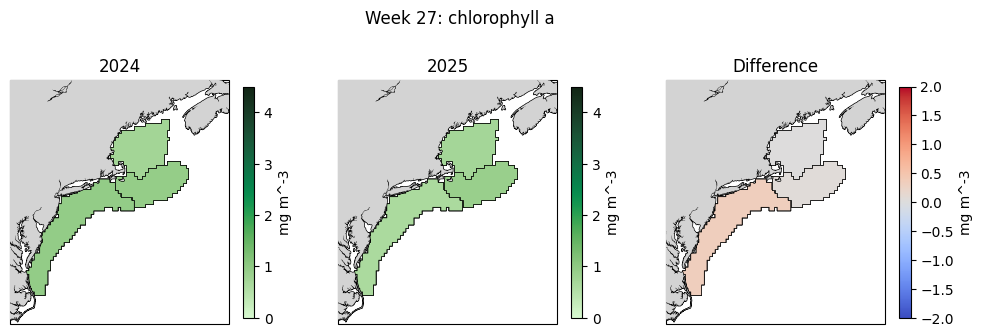

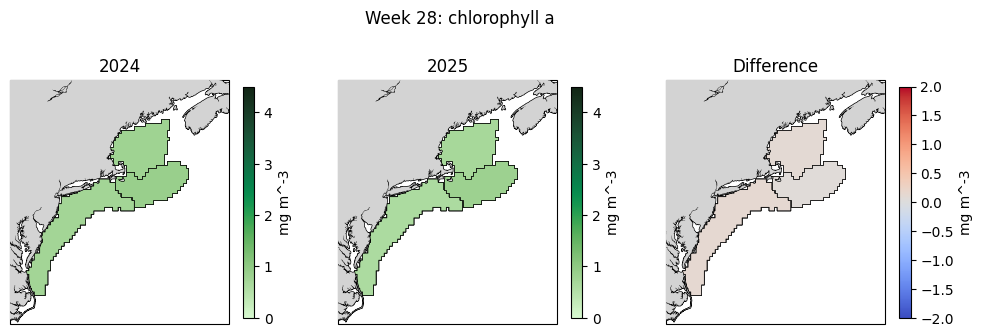

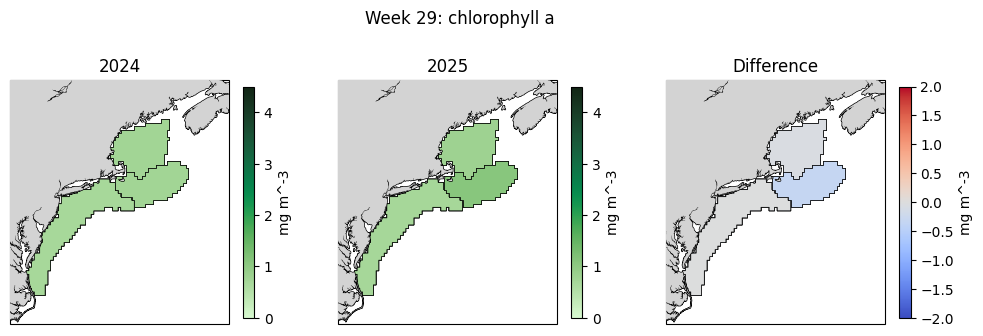

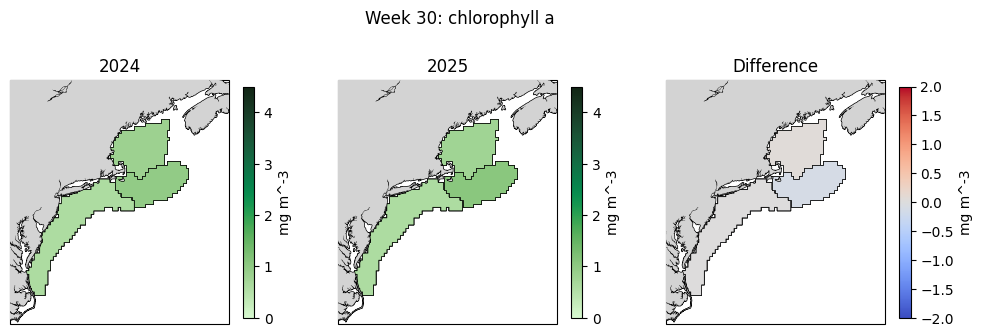

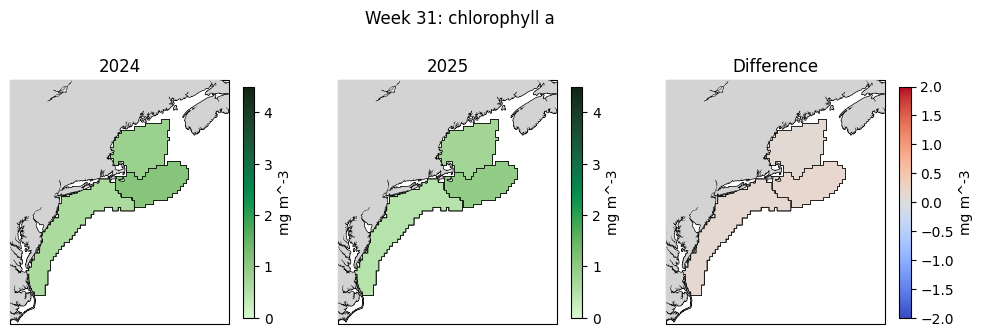

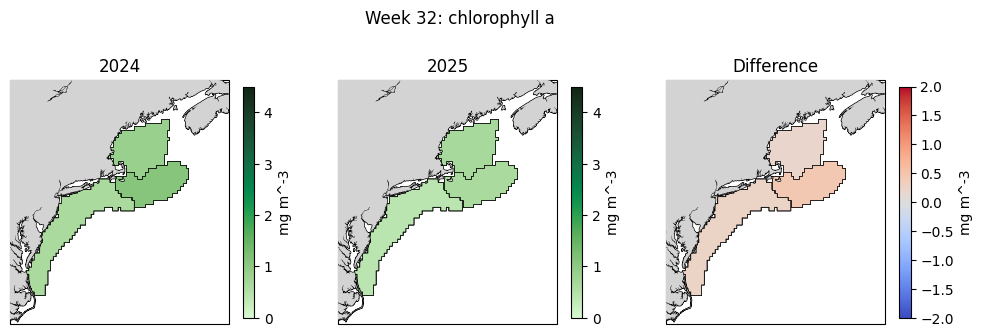

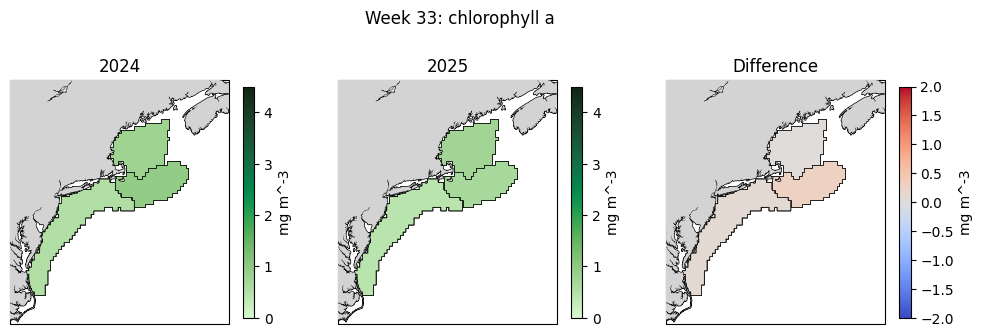

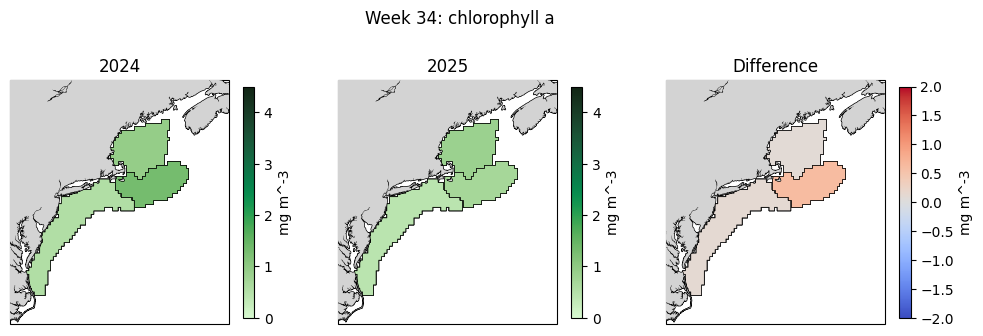

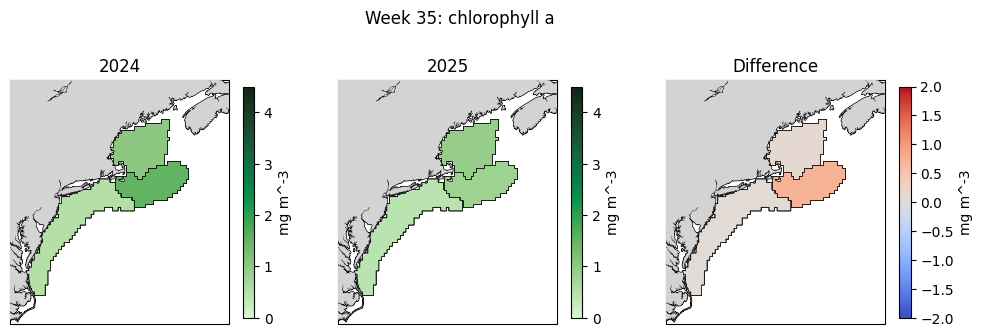

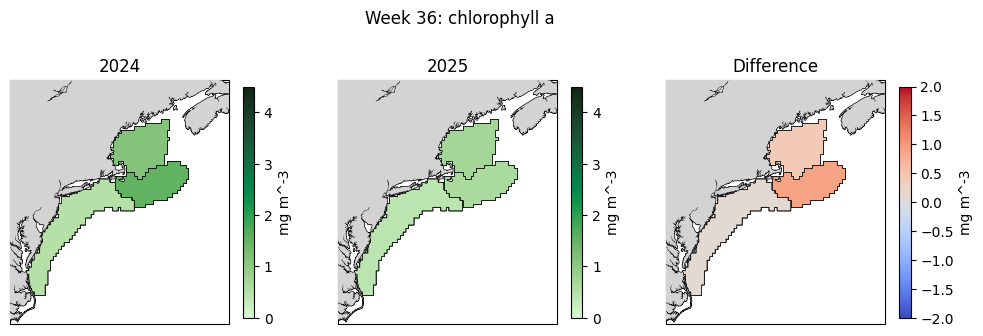

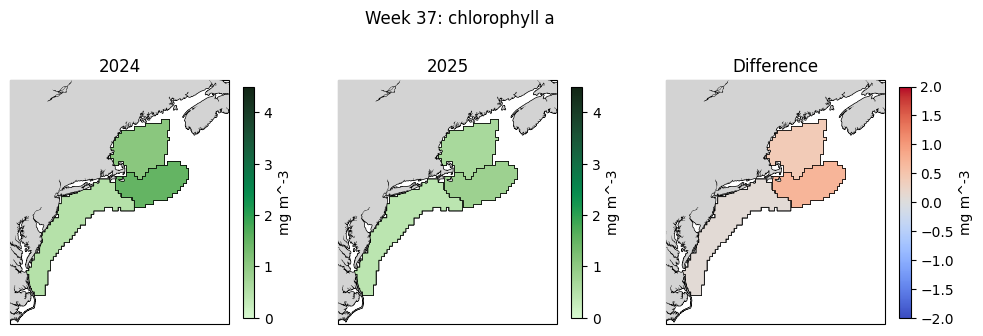

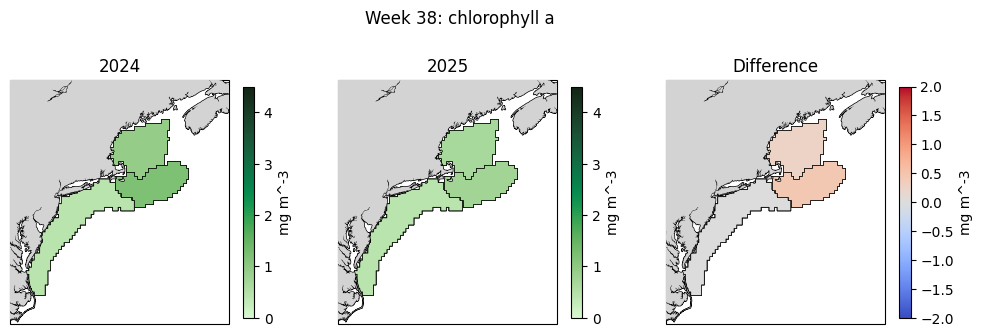

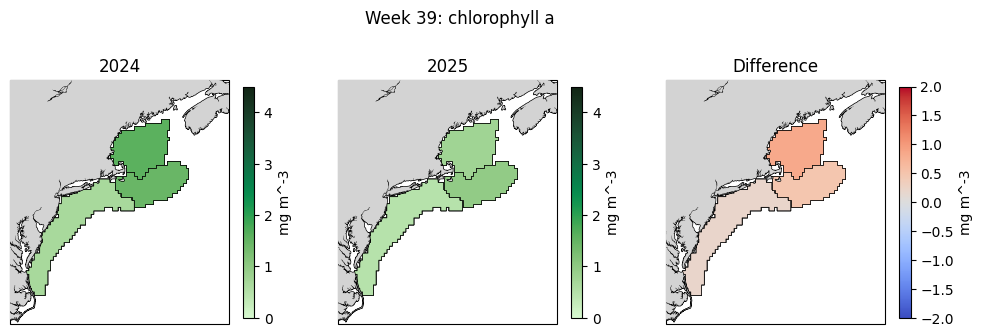

In [145]:
dir1, dir2= get_dirs(['2025','2026']) #get directories for each year 
df_ids = ['CHLOR_A-STATS']#,'PPD-STATS','FMICRO-STATS','FNANO-STATS','FPICO-STATS','MICRO-STATS','NANO-STATS','PICO-STATS'] #unique id from dataframe csv to check 
for df_id in df_ids:
    df1 = pd.read_csv(os.path.join(dir1,[s for s in os.listdir(dir1) if df_id in s][0])).reset_index()
    df2 = pd.read_csv(os.path.join(dir2,[s for s in os.listdir(dir2) if df_id in s][0])).reset_index()
    df1 = realign_phyto_SOE(df1)#,csv_name=os.path.join(dir1,[s for s in os.listdir(dir1) if df_id in s][0]).split('.')[0]+'_V1.csv')
    df2 = realign_phyto_SOE(df2)#,csv_name=os.path.join(dir1,[s for s in os.listdir(dir1) if df_id in s][0]).split('.')[0]+'_V1.csv')
    df1['TIME_START']=pd.to_datetime(df1['TIME_START'])
    df1['TIME_END']=pd.to_datetime(df1['TIME_END'])
    df2['TIME_START']=pd.to_datetime(df2['TIME_START'])
    df2['TIME_END']=pd.to_datetime(df2['TIME_END'])
    
    sub1= df1[df1.TIME_START.dt.year==2024]
    sub2= df2[df2.TIME_START.dt.year==2025]
    for x in range(1,53):
        if x <10:
            xx='0'+str(x)
        else:
            xx=str(x)
        w1= sub1[sub1.PERIOD==f'W_2024{xx}']
        w2= sub2[sub2.PERIOD==f'W_2025{xx}']
        merged = pd.merge(w1,w2, on='SUBAREA', how='inner')
        if len(merged)==0:
            pass
        else: 
            shp = gpd.read_file(r'C:\Users\haley.synan\Documents\DATA\SHAPEFILES\EPU_NOESTUARIES\EPU_NOESTUARIES.shp')
            shp = shp.rename(columns={'EPU':'SUBAREA'})
            shp = shp.merge(merged[['PERIOD_x','SUBAREA','VALUE_x','UNITS_x','VALUE_y','PRODUCT_LONG_NAME_x']], on="SUBAREA", how="inner")
            shp['diff'] = shp.VALUE_x-shp.VALUE_y
            shp['log_x']= np.log10(shp.VALUE_x)
            shp['log_y']= np.log10(shp.VALUE_y)
            
            fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12,5),subplot_kw=dict(projection=cartopy.crs.PlateCarree()))
            shp.plot(
                column='VALUE_x', 
                cmap=cm.cm.algae, 
                legend=True,   
                ax=ax1,         
                edgecolor='black', 
                linewidth=0.5,   
                legend_kwds={"shrink": 0.6,'label':f'{merged.UNITS_x.iloc[0]}'},
                vmin=0,
                vmax=4.5
            )
            ax1.add_feature(cartopy.feature.COASTLINE, linewidth=1) #add coastlines
            ax1.add_feature(cartopy.feature.LAND, zorder=100, facecolor='lightgrey') #add land mask 
            ax1.set_extent([-77, -63.5, 34.5, 46])
            ax1.set_title('2024')
            
            shp.plot(
                column='VALUE_y', 
                cmap=cm.cm.algae, 
                legend=True,   
                ax=ax2,         
                edgecolor='black',
                linewidth=0.5,  
                legend_kwds={"shrink": 0.6, 'label':f'{merged.UNITS_x.iloc[0]}'},
                vmin=0,
                vmax=4.5
            )
            ax2.add_feature(cartopy.feature.COASTLINE, linewidth=1) #add coastlines
            ax2.add_feature(cartopy.feature.LAND, zorder=100, facecolor='lightgrey') #add land mask 
            ax2.set_extent([-77, -63.5, 34.5, 46])
            ax2.set_title('2025')
            
            shp.plot(
                column='diff', 
                cmap='coolwarm', 
                legend=True,    
                ax=ax3,          
                edgecolor='black', 
                linewidth=0.5,  
                legend_kwds={"shrink": 0.6, 'label':f'{merged.UNITS_x.iloc[0]}'},
                vmin=-2,
                vmax=2
            )
            ax3.add_feature(cartopy.feature.COASTLINE, linewidth=1) #add coastlines
            ax3.add_feature(cartopy.feature.LAND, zorder=100, facecolor='lightgrey') #add land mask 
            ax3.set_extent([-77, -63.5, 34.5, 46])
            ax3.set_title('Difference')
            plt.suptitle(f'Week {shp.PERIOD_x.iloc[0][-2:]}: {shp.PRODUCT_LONG_NAME_x.iloc[0]}',y=0.88)
            plt.show()
        
       

### Create weekly animation 
Note: I had issues running this in a loop, so right now you would just need to change out the df_id

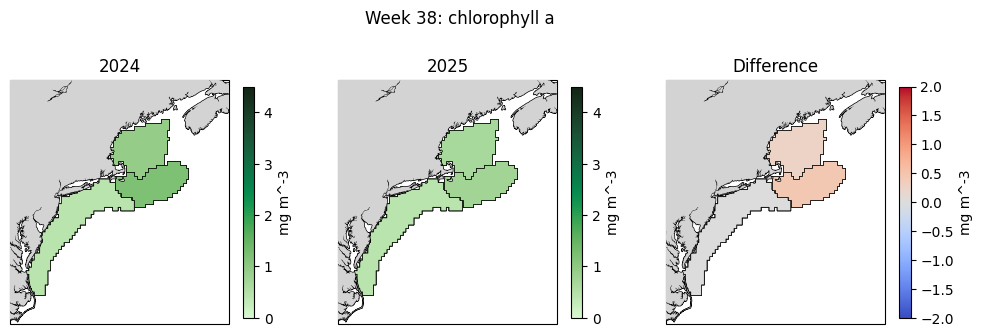

In [156]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
def update(frame):
    # Clear only plotted collections, not the whole axis (keeps colorbars)
    ax1.clear()
    ax2.clear()
    ax3.clear()
    for ax in (ax1, ax2, ax3):
        ax.add_feature(cfeature.COASTLINE, linewidth=1)
        ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey')
        ax.set_extent([-77, -63.5, 34.5, 46])


    xx = f"{frame:02d}"
    w1 = sub1[sub1.PERIOD==f'W_2024{xx}']
    w2 = sub2[sub2.PERIOD==f'W_2025{xx}']
    merged = pd.merge(w1, w2, on='SUBAREA', how='inner')

    shp = shp_base.merge(
        merged[['PERIOD_x','SUBAREA','VALUE_x','VALUE_y','PRODUCT_LONG_NAME_x']],
        on="SUBAREA", how="inner"
    )
    shp['diff'] = shp.VALUE_x - shp.VALUE_y
    shp['log_x'] = np.log10(shp.VALUE_x)
    shp['log_y'] = np.log10(shp.VALUE_y)

    # Plot each panel (legend=False so we don’t add new colorbars)
    shp.plot(column='VALUE_x', cmap=cmap_val, ax=ax1,
             edgecolor='black', linewidth=0.5, legend=False,
             vmin=0, vmax=4.5)
    ax1.set_title('2024')

    shp.plot(column='VALUE_y', cmap=cmap_val, ax=ax2,
             edgecolor='black', linewidth=0.5, legend=False,
             vmin=0, vmax=4.5)
    ax2.set_title('2025')

    shp.plot(column='diff', cmap=cmap_diff, ax=ax3,
             edgecolor='black', linewidth=0.5, legend=False,
             vmin=-2, vmax=2)
    ax3.set_title('Difference')

    fig.suptitle(f'Week {shp.PERIOD_x.iloc[0][-2:]}: {shp.PRODUCT_LONG_NAME_x.iloc[0]}', y=0.88)




dir1, dir2= get_dirs(['2025','2026']) #get directories for each year 
df_id = ['CHLOR_A-STATS']#,'PPD-STATS','FMICRO-STATS','FNANO-STATS','FPICO-STATS','MICRO-STATS','NANO-STATS','PICO-STATS'] #unique id from dataframe csv to check 

df1 = pd.read_csv(os.path.join(dir1,[s for s in os.listdir(dir1) if df_id[0] in s][0])).reset_index()
df2 = pd.read_csv(os.path.join(dir2,[s for s in os.listdir(dir2) if df_id[0] in s][0])).reset_index()
df1 = realign_phyto_SOE(df1)#,csv_name=os.path.join(dir1,[s for s in os.listdir(dir1) if df_id in s][0]).split('.')[0]+'_V1.csv')
df2 = realign_phyto_SOE(df2)#,csv_name=os.path.join(dir1,[s for s in os.listdir(dir1) if df_id in s][0]).split('.')[0]+'_V1.csv')
df1['TIME_START']=pd.to_datetime(df1['TIME_START'])
df1['TIME_END']=pd.to_datetime(df1['TIME_END'])
df2['TIME_START']=pd.to_datetime(df2['TIME_START'])
df2['TIME_END']=pd.to_datetime(df2['TIME_END'])

sub1= df1[df1.TIME_START.dt.year==2024]
sub2= df2[df2.TIME_START.dt.year==2025]

# Load shapefile once
shp_base = gpd.read_file(
    r'C:\Users\haley.synan\Documents\DATA\SHAPEFILES\EPU_NOESTUARIES\EPU_NOESTUARIES.shp'
)
shp_base = shp_base.rename(columns={'EPU':'SUBAREA'})

fig, (ax1, ax2, ax3) = plt.subplots(
    1, 3, figsize=(12,5),
    subplot_kw=dict(projection=ccrs.PlateCarree())
)
    
# Add static features once
for ax in (ax1, ax2, ax3):
    ax.add_feature(cfeature.COASTLINE, linewidth=1)
    ax.add_feature(cfeature.LAND, zorder=100, facecolor='lightgrey')
    ax.set_extent([-77, -63.5, 34.5, 46])

# --- Define colormaps and normalization ---
cmap_val = cm.cm.algae
norm_val = plt.Normalize(vmin=0, vmax=4.5)

cmap_diff = plt.cm.coolwarm
norm_diff = plt.Normalize(vmin=-2, vmax=2)

# --- Add static colorbars ---
sm_val = plt.cm.ScalarMappable(cmap=cmap_val, norm=norm_val)
sm_val._A = []  # required trick
fig.colorbar(sm_val, ax=ax1, shrink=0.6, label=f'{merged.UNITS_x.iloc[0]}')
fig.colorbar(sm_val, ax=ax2, shrink=0.6, label=f'{merged.UNITS_x.iloc[0]}')

sm_diff = plt.cm.ScalarMappable(cmap=cmap_diff, norm=norm_diff)
sm_diff._A = []
fig.colorbar(sm_diff, ax=ax3, shrink=0.6, label=f'{merged.UNITS_x.iloc[0]}')
ani = animation.FuncAnimation(fig, update, interval=1000, frames=range(1,39), repeat=False)
ani.save(rf"C:\Users\haley.synan\Documents\SEASCAPES\CODE\FIGURES\weekly_{shp.PRODUCT_LONG_NAME_x.iloc[0]}.gif", writer="pillow", dpi=150,savefig_kwargs={'pad_inches': 0})
plt.show()
 # Create animation
#ani = animation.FuncAnimation(fig, update, interval=1000, frames=range(1,39), repeat=False)

# Save as mp4 or gif
#ani.save(rf"C:\Users\haley.synan\Documents\SEASCAPES\CODE\FIGURES\weekly_{shp.PRODUCT_LONG_NAME_x.iloc[0]}.gif", writer="pillow", dpi=150,savefig_kwargs={'pad_inches': 0})

#plt.show()

### Summary stats
#### Weekly 

In [149]:
sub2['week_num']=[s[-2:] for s in sub2.PERIOD]
sub2['time_period'] = [s[0] for s in sub2.PERIOD]
sub1['week_num']=[s[-2:] for s in sub1.PERIOD]
sub1['time_period'] = [s[0] for s in sub1.PERIOD]

merged = pd.merge(sub1[['SUBAREA','VARIABLE','week_num','time_period','VALUE','UNITS']],sub2[['SUBAREA','VARIABLE','week_num','time_period','VALUE','UNITS']], on=['SUBAREA','VARIABLE','week_num','time_period',], how='inner')
merged=merged.rename(columns={'VALUE_x':'VALUE_2024','VALUE_y':'VALUE_2025'})
merged['diff_2025-2024'] = merged.VALUE_2025-merged.VALUE_2024
merged[merged.time_period=='W'].describe()

C:\Users\haley.synan\AppData\Local\Temp\ipykernel_3748\931306849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub2['week_num']=[s[-2:] for s in sub2.PERIOD]
C:\Users\haley.synan\AppData\Local\Temp\ipykernel_3748\931306849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub2['time_period'] = [s[0] for s in sub2.PERIOD]
C:\Users\haley.synan\AppData\Local\Temp\ipykernel_3748\931306849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,VALUE_2024,VALUE_2025,diff_2025-2024
count,234.000000,234.000000,234.000000
mean,1.056583,0.835193,-0.221390
std,0.327151,0.197620,0.290504
min,0.434117,0.387125,-2.067071
25%,0.826219,0.695252,-0.388980
50%,1.034452,0.824759,-0.171035
75%,1.198940,0.965642,-0.046204
max,2.801724,1.552609,0.450442


#### Monthly

In [150]:
merged[merged.time_period=='M'].describe()

,VALUE_2024,VALUE_2025,diff_2025-2024
count,54.000000,54.000000,54.000000
mean,1.025749,0.814275,-0.211473
std,0.248807,0.171821,0.170156
min,0.479676,0.412082,-0.771970
25%,0.898694,0.710884,-0.296725
50%,0.982856,0.800531,-0.183305
75%,1.155240,0.942075,-0.110931
max,1.950471,1.241216,0.067162
